In [ ]:
from ipy_oxdna.umbrella_sampling import ComUmbrellaSampling
from ipy_oxdna.oxdna_simulation import SimulationManager

import numpy as np
import pandas as pd
import os
from os.path import join
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'no-latex', 'bright'])

In [ ]:
sim_manager = SimulationManager()

path = os.path.abspath('./')

systems = ['rro', 't9', 't20']

file_dirs = [f'{path}/{sys}' for sys in systems]

condition = ['rro_k02', 't9_k02', 't20_k02']

com_lists = ['157,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,6830,6742,6743,6744,6745,6746,6747,6748,6749,6750,6751,6752,6753,6754,6755,6756,6757,6758,6759,6760,6761,6762,6763,6764,6765,6766,6767,6768,6769,6770,6771,6772,6773,6774,6775,6776,6777,6778,6779,6780,6781,6782,6783,6784,6785,6786,6787,6788,6789,6790,6791,6792,6793,6794,6795,6796,6797,6798,6799,6800,6801,6802,6803,6804,6805,6806,6807,6808,6809,6810,6811,6812,6813,6814,6815,6816,6817,6818,6819,6820,6821,6822,6823,6824,6825,6826,6827,6828,6829,6736,6737,6738,6739,6740,6741',
             '6754,6788,6755,6756,6757,6758,6759,6760,6761,6762,6763,6764,6765,6766,6767,6768,6769,6770,6771,6772,6773,6774,6775,6776,6777,6778,6779,6780,6781,6782,6783,6784,6785,6786,6787,6825,6789,6790,6791,6792,6793,6794,6795,6796,6797,6798,6799,6800,6801,6802,6803,6804,6805,6806,6807,6808,6809,6810,6811,6812,6813,6814,6815,6816,6817,6818,6819,6820,6821,6822,6823,6824,6848,6826,6827,6828,6829,6830,6831,6832,6833,6834,6835,6836,6837,6838,6839,6840,6841,6842,6843,6844,6845,6846,6847,81,175,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174',
             '6776,6800,6777,6778,6779,6780,6781,6782,6783,6784,6785,6786,6787,6788,6789,6790,6791,6792,6793,6794,6795,6796,6797,6798,6799,6840,6801,6802,6803,6804,6805,6806,6807,6808,6809,6810,6811,6812,6813,6814,6815,6816,6817,6818,6819,6820,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830,6831,6832,6833,6834,6835,6836,6837,6838,6839,6860,6841,6842,6843,6844,6845,6846,6847,6848,6849,6850,6851,6852,6853,6854,6855,6856,6857,6858,6859,6870,6861,6862,6863,6864,6865,6866,6867,6868,6869,103,188,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,197,189,190,191,192,193,194,195,196'
            ]
ref_lists = ['3541,3352,3353,3354,3355,3356,3357,3358,3359,3360,3361,3362,3363,3364,3365,3366,3367,3368,3369,3370,3371,3372,3373,3374,3375,3376,3377,3378,3379,3380,3381,3382,3383,3384,3385,3386,3387,3388,3389,3390,3391,3392,3393,3394,3395,3396,3397,3398,3399,3400,3401,3402,3403,3404,3405,3406,3407,3408,3409,3410,3411,3412,3413,3414,3415,3416,3417,3418,3419,3420,3421,3422,3423,3424,3425,3426,3427,3428,3429,3430,3431,3432,3433,3434,3435,3436,3437,3438,3439,3440,3441,3442,3443,3444,3445,3446,3447,3448,3449,3450,3451,3452,3453,3454,3455,3456,3457,3458,3459,3460,3461,3462,3463,3464,3465,3466,3467,3468,3469,3470,3471,3472,3473,3474,3475,3476,3477,3478,3479,3480,3481,3482,3483,3484,3485,3486,3487,3488,3489,3490,3491,3492,3493,3494,3495,3496,3497,3498,3499,3500,3501,3502,3503,3504,3505,3506,3507,3508,3509,3510,3511,3512,3513,3514,3515,3516,3517,3518,3519,3520,3521,3522,3523,3524,3525,3526,3527,3528,3529,3530,3531,3532,3533,3534,3535,3536,3537,3538,3539,3540',
             '3559,3535,3536,3537,3538,3539,3540,3541,3542,3543,3544,3545,3546,3547,3548,3549,3550,3551,3552,3553,3554,3555,3556,3557,3558,3509,3510,3511,3512,3513,3514,3515,3516,3517,3518,3519,3520,3521,3522,3523,3524,3525,3526,3527,3528,3529,3530,3531,3532,3533,3534,3497,3498,3499,3500,3501,3502,3503,3504,3505,3506,3507,3508,3482,3483,3484,3485,3486,3487,3488,3489,3490,3491,3492,3493,3494,3495,3496,3470,3471,3472,3473,3474,3475,3476,3477,3478,3479,3480,3481,3449,3450,3451,3452,3453,3454,3455,3456,3457,3458,3459,3460,3461,3462,3463,3464,3465,3466,3467,3468,3469,3420,3421,3422,3423,3424,3425,3426,3427,3428,3429,3430,3431,3432,3433,3434,3435,3436,3437,3438,3439,3440,3441,3442,3443,3444,3445,3446,3447,3448,3370,3371,3372,3373,3374,3375,3376,3377,3378,3379,3380,3381,3382,3383,3384,3385,3386,3387,3388,3389,3390,3391,3392,3393,3394,3395,3396,3397,3398,3399,3400,3401,3402,3403,3404,3405,3406,3407,3408,3409,3410,3411,3412,3413,3414,3415,3416,3417,3418,3419',
             '3581,3542,3543,3544,3545,3546,3547,3548,3549,3550,3551,3552,3553,3554,3555,3556,3557,3558,3559,3560,3561,3562,3563,3564,3565,3566,3567,3568,3569,3570,3571,3572,3573,3574,3575,3576,3577,3578,3579,3580,3519,3520,3521,3522,3523,3524,3525,3526,3527,3528,3529,3530,3531,3532,3533,3534,3535,3536,3537,3538,3539,3540,3541,3493,3494,3495,3496,3497,3498,3499,3500,3501,3502,3503,3504,3505,3506,3507,3508,3509,3510,3511,3512,3513,3514,3515,3516,3517,3518,3431,3432,3433,3434,3435,3436,3437,3438,3439,3440,3441,3442,3443,3444,3445,3446,3447,3448,3449,3450,3451,3452,3453,3454,3455,3456,3457,3458,3459,3460,3461,3462,3463,3464,3465,3466,3467,3468,3469,3470,3471,3472,3473,3474,3475,3476,3477,3478,3479,3480,3481,3482,3483,3484,3485,3486,3487,3488,3489,3490,3491,3492,3392,3393,3394,3395,3396,3397,3398,3399,3400,3401,3402,3403,3404,3405,3406,3407,3408,3409,3410,3411,3412,3413,3414,3415,3416,3417,3418,3419,3420,3421,3422,3423,3424,3425,3426,3427,3428,3429,3430'
            ]
             
stiff = 0.2
xmin = 0
xmax = 72.787
n_windows = 15
steps = 2e5
starting_r0 = 35


pre_equlibration_parameters = {'dt':f'0.003','steps':'2e5','print_energy_every': '1e6', 'print_conf_interval':'1e6','fix_diffusion': 'false'}
equlibration_parameters = {'dt':f'0.003', 'steps':'2e5','print_energy_every': '2e5','print_conf_interval':'1e7', 'fix_diffusion':'false'}
production_parameters = {'dt':f'0.003', 'steps':'2e7','print_energy_every': '1e7','print_conf_interval':'1e7', 'fix_diffusion':'false'}

us_list = [ComUmbrellaSampling(file_dir, sys, clean_build='force') for file_dir, sys in zip(file_dirs,condition)]

simulation_manager = SimulationManager()


In [ ]:
for us, com_list, ref_list in zip(us_list, com_lists, ref_lists):
    print(us.system)
    us.build_pre_equlibration_runs(
        simulation_manager, n_windows, com_list, ref_list,
        stiff, xmin, xmax, pre_equlibration_parameters, starting_r0, steps,
        print_every=1e3, observable=True, protein=None,
        force_file=None, continue_run=False)

In [ ]:
simulation_manager.run(gpu_mem_block=False)

In [6]:
for us, com_list, ref_list in zip(us_list, com_lists, ref_lists):
    us.build_equlibration_runs(
        simulation_manager, n_windows, com_list, ref_list,
        stiff, xmin, xmax, equlibration_parameters,
        print_every=1e4, observable=True, protein=None,
        force_file=None, continue_run=False)

In [ ]:
simulation_manager.run(gpu_mem_block=False)

In [18]:
for us, com_list, ref_list in zip(us_list, com_lists, ref_lists):
    us.build_production_runs(
        simulation_manager, n_windows, com_list, ref_list,
        stiff, xmin, xmax, production_parameters,
        observable=True, print_every=1e4, protein=None,
        force_file=None, continue_run=False)

In [ ]:
simulation_manager.run(gpu_mem_block=False)

In [ ]:
simulation_manager.terminate_all()

In [ ]:
for us in us_list:
    for idx in [10,]: #range(0, 15, 10):
        us.analysis.view_last_conf('eq', idx)

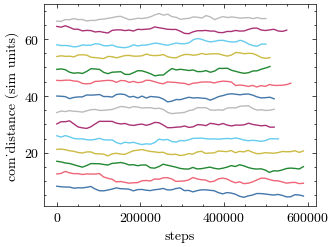

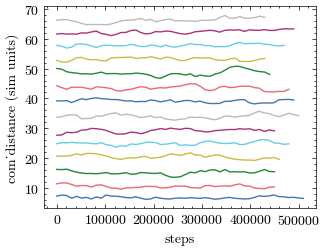

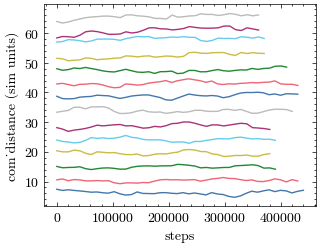

In [21]:
for us, com_list, ref_list in zip(us_list, com_lists, ref_lists):
    us.observables.com_distance_observable(com_list, ref_list)
    plt.figure()
    for idx in range(0,14,1):
        us.analysis.view_observable('prod', idx, sliding_window=False)


In [23]:
wham_dir = os.path.abspath('/scratch/matthew/ipy_oxDNA/wham/wham')

n_bins = '200'
tol = '1e-5'
n_boot = '0'
stiff = 0.2
xmin = 0
xmax = 72.787
n_windows = 15

for us in us_list:
    us.wham_run(wham_dir, xmin, xmax, stiff, n_bins, tol, n_boot)

Running WHAM analysis...
WHAM analysis completed
Running WHAM analysis...
WHAM analysis completed
Running WHAM analysis...
WHAM analysis completed


In [ ]:
ax = us_list[0].wham.plt_fig()
for us in us_list:
    us.plot_free(ax=ax)

In [ ]:
n_chunks = 2
data_added_per_iteration = 3

wham_dir = os.path.abspath('/scratch/matthew/ipy_oxDNA/wham/wham')
n_bins = '200'
tol = '1e-5'
n_boot = '0'
stiff = 0.2
xmin = 0
xmax = 72.787
n_windows = 15


for us in us_list:
    us.wham.get_n_data_per_com_file()
    us.wham.convergence_analysis(n_chunks, data_added_per_iteration, wham_dir, xmin, xmax, stiff, n_bins, tol, n_boot)

In [ ]:
for us in us_list:
    us.wham.plot_truncated_free_energy()
    plt.legend()
    plt.title(us.system)
    us.wham.plot_chunks_free_energy()
    plt.legend()
    plt.title(us.system)
    plt.show()